# Exploring the Food Choices of People

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from statsmodels.stats import weightstats
from scipy.stats import mstats


In [11]:
location = r"F:/EducationalData/Simplilearn/ML/Files/datasets/food.csv"

In [12]:
food_choices = pd.read_csv(location, sep = ',')

In [13]:
food_choices.sample(6)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
87,3.2,2,1,720,3.0,420.0,1,"pizza, pasta, mac and cheese",when i am sad or craving,4.0,...,1.0,1.0,1,1165.0,690,field hockey,4,1,1315,155
10,3.5,1,1,610,3.0,980.0,2,"Pasta, grandma homemade chocolate cake anythin...",Boredom,1.0,...,1.0,1.0,2,940.0,345,soccer,5,2,900,116
67,3.6,1,1,610,2.0,420.0,1,"Ice cream, cake, mozzarella sticks, pierogies",Boredom,4.0,...,1.0,1.0,2,940.0,690,"Recreational Basketball, Equestrian Team",5,2,1315,144 lbs
106,3,1,1,430,3.0,315.0,2,"Pizza, soda, chocolate brownie, chicken tikka ...",Stress and sadness,2.0,...,1.0,2.0,4,580.0,500,None,5,2,760,130
80,3.4,1,1,430,2.0,420.0,2,"Cookies, burgers, chicken noodle soup, ice cream","happiness, hunger, sadness",3.0,...,1.0,2.0,4,1165.0,500,NaN,2,1,900,130
97,3.9,1,1,720,3.0,420.0,2,"Mac and Cheese, Pizza, Ice Cream and French Fr...","Boredom, anger and just being hungry in general.",3.0,...,1.0,1.0,3,1165.0,500,Running,5,2,760,155


In [14]:
food_choices.shape

(125, 54)

In [20]:
food_choices.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'cook', 'cuisine', 'drink', 'eating_out',
       'employment', 'ethnic_food', 'exercise', 'father_education', 'fav_food',
       'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling',
       'income', 'indian_food', 'italian_food', 'life_rewarding',
       'marital_status', 'mother_education', 'nutritional_check',
       'on_off_campus', 'parents_cook', 'pay_meal_out', 'persian_food',
       'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories', 'weight'],
      dtype='object')

Some of the columns contain not numerical information from quizes, such columns will be removed, others are categorical values, they will stay.

In [23]:
# #food_choices = food_choices.drop(['comfort_food', 
#                                   'comfort_food_reasons', 
#                                   'diet_current', 
#                                   'eating_changes', 
#                                   'father_profession',
#                                   'fav_cuisine',
#                                   'food_childhood', 
#                                   'healthy_meal',
#                                   'ideal_diet',
#                                   'meals_dinner_friend', 
#                                   'mother_profession', 
#                                   'type_sports'], axis = 1)

In [24]:
#food_choices.shape

In [25]:
#food_choices.columns

Now we have only 49 columns, we will decrease the number of columns further for the exploration part and we can return here if we want to include all the information in a regression model.

In [37]:
gpa_data = food_choices.drop(['calories_day', 
                             
                              'cook',
                              'cuisine', 
                              
                              
                              'eating_out',
                              'employment',
                              'ethnic_food', 
                              'exercise', 
                              'father_education',
                              
                              'fav_food', 
                              'fries', 
                              'fruit_day', 
                              'grade_level',
                              'greek_food', 
                              'healthy_feeling', 
                             
                              'income',
                              'indian_food', 
                              'italian_food', 
                              'life_rewarding', 
                              'marital_status',
                              'mother_education', 
                              'nutritional_check', 
                              'on_off_campus',
                              'parents_cook', 
                              'pay_meal_out', 
                              'persian_food',
                              'self_perception_weight', 
                              'soup', 
                              'sports'], axis = 1)

In [38]:
gpa_data.shape

(125, 14)

In [39]:
gpa_data.head()

,GPA,Gender,breakfast,calories_chicken,calories_scone,coffee,drink,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,315.0,1,1.0,1,1165.0,345,5,1,1315,187
1,3.654,1,1,610,420.0,2,2.0,2,725.0,690,4,2,900,155
2,3.3,1,1,720,420.0,2,1.0,5,1165.0,500,5,1,900,I'm not answering this.
3,3.2,1,1,430,420.0,2,2.0,5,725.0,690,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,420.0,2,2.0,4,940.0,500,4,2,760,190


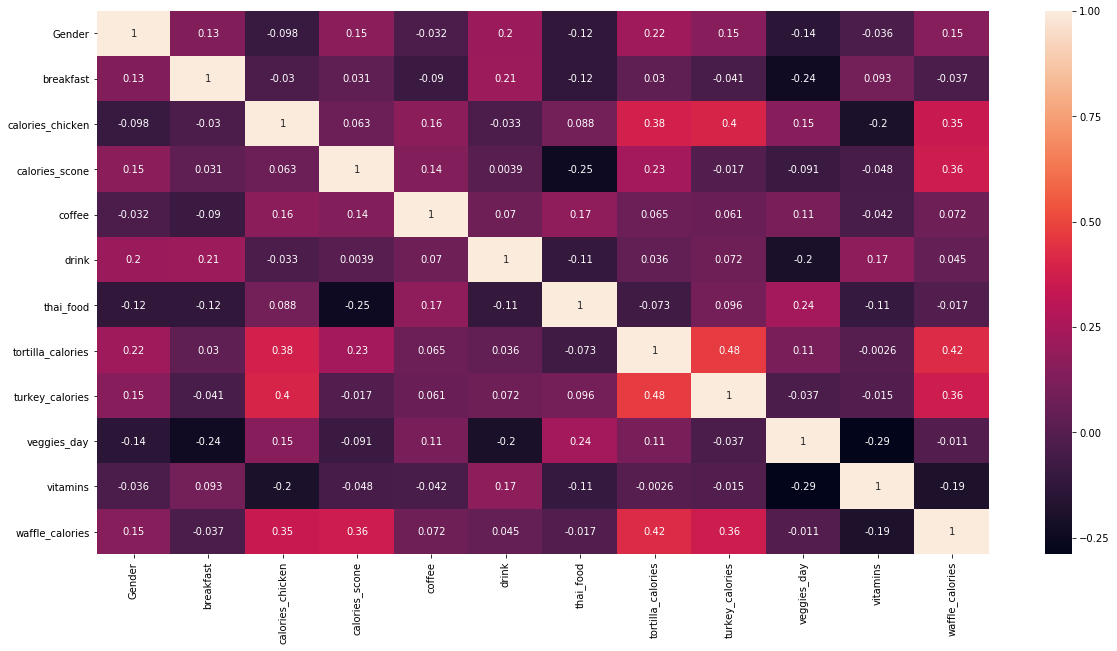

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(gpa_data.corr(), annot = True);

Text(0.5, 1.0, 'Scater Plot Correlation Coefficient = 0.48')

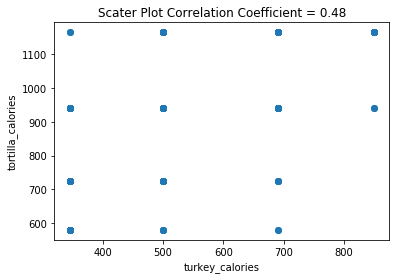

In [41]:
plt.scatter(gpa_data['turkey_calories'], gpa_data['tortilla_calories'])
plt.xlabel('turkey_calories')
plt.ylabel('tortilla_calories')
plt.title('Scater Plot Correlation Coefficient = 0.48')

Text(0.5, 1.0, 'Scater Plot Correlation Coefficient = 0.11')

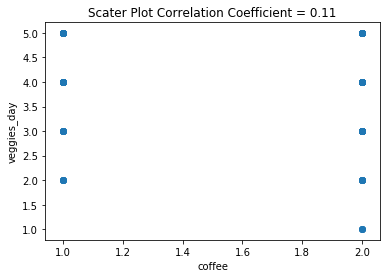

In [42]:
plt.scatter(gpa_data['coffee'], gpa_data['veggies_day'])
plt.xlabel('coffee')
plt.ylabel('veggies_day')
plt.title('Scater Plot Correlation Coefficient = 0.11')

The values don't seem to be correlated, this is due to the reason that some of them are categorical values. If we want to more exploration we should consider the chi-square test 